In [2]:
import os
os.chdir('./..')
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [3]:
_BASE_PATH = 'resources/dataset/originals'
speed_df=pd.read_csv(f'{_BASE_PATH}/speeds_train.csv.gz')
speed_df.head()

,KEY,DATETIME_UTC,KM,SPEED_AVG,SPEED_SD,SPEED_MIN,SPEED_MAX,N_VEHICLES,KEY_2
0,0,2018-09-01 01:00:00,443,97.889000,1.144099,97.080,98.698,2,0_443
1,0,2018-09-01 03:15:00,443,154.788667,16.287509,137.530,169.890,3,0_443
2,0,2018-09-01 12:45:00,443,136.091778,10.759666,124.586,163.418,18,0_443
3,0,2018-09-01 19:15:00,443,136.916276,15.089653,114.878,169.890,58,0_443
4,0,2018-09-02 09:45:00,443,135.476385,23.125778,82.518,169.890,26,0_443


In [4]:
events_df=pd.read_csv(f'{_BASE_PATH}/events_train.csv.gz')
events_df.head()

,START_DATETIME_UTC,END_DATETIME_UTC,EVENT_DETAIL,EVENT_TYPE,KM_END,KM_START,KEY,KEY_2
0,2018-07-19 07:34:46,2018-08-01 15:23:17,0.0,Gestione_viabilita,959,954,523.0,523_959
1,2018-07-25 12:20:06,2018-10-12 18:29:37,1.0,Pavimentazione,1814,1821,325.0,325_1814
2,2018-08-01 07:44:00,2018-08-01 16:18:58,2.0,Manutenzione_opere_in_verde,321,282,525.0,525_321
3,2018-08-01 08:14:30,2018-08-01 17:39:13,3.0,Opera_arte,713,712,517.0,517_713
4,2018-08-01 08:18:32,2018-08-01 17:38:27,3.0,Opera_arte,2542,2543,518.0,518_2542


# FUNZIONE EPLORAZIONE INCROCIATA

In [20]:
def plot_speed_event(road_key=6,sensor_km = 669,date_start='2018-09-20',date_end='2018-10-02'):
    
    #FILTRAGGIO SU SPEED
    speed_df.sort_values(by=['DATETIME_UTC'],inplace=True)
    tmp=speed_df.loc[(speed_df['KEY'] == road_key)]
    tmp=tmp.loc[(tmp['KM'] == sensor_km)]
    tmp['DATETIME_UTC'] = pd.to_datetime(tmp['DATETIME_UTC'],format="%Y/%m/%d")
    
    mask = (tmp['DATETIME_UTC'] >= date_start) & (tmp['DATETIME_UTC'] <= date_end)
    tmp=tmp.loc[mask]
    tmp ["EVENTS"]= 'x'
    
    print ("Ci sono ", tmp.shape[0], " rilevazioni del sensore in questo intervallo di tempo")

    
    #FILTRAGGIO SU EVENT
    tmp1=events_df.loc[(events_df['KEY'] == road_key)]
    mask1 = (tmp1['END_DATETIME_UTC'] >=date_start) & (tmp1['END_DATETIME_UTC'] <= date_end)
    tmp1=tmp1.loc[mask1]

    mask2 = (tmp1['KM_START'] <= sensor_km) & (tmp1['KM_END'] >= sensor_km)
    tmp1=tmp1.loc[mask2]
    
    print ("Ci sono ", tmp1.shape[0], " eventi per quello specifico sensore in questo intervallo di tempo")
    event_type=tmp1.EVENT_TYPE.unique()
    print("Questi sono gli eventi che avvengo ", tmp1.EVENT_TYPE.values)


    #AGGIORNO speed AGGIUNGENDO L'EVENTO
    for row in tmp1.itertuples():
        tmp.loc[(tmp['DATETIME_UTC'] >= row.START_DATETIME_UTC) & (tmp['DATETIME_UTC'] <= row.END_DATETIME_UTC),"EVENTS"]=row.EVENT_TYPE

    
    #PLOTTAGGIO
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.xticks(rotation=70)
    
    ax.plot_date(tmp[tmp['EVENTS'] == 'x']['DATETIME_UTC'], tmp[tmp['EVENTS'] == 'x']['SPEED_AVG'], marker='o', markersize=2 , mew=2, label='normal')
    for t in event_type:
        ax.plot_date(tmp[tmp['EVENTS'] == t]['DATETIME_UTC'], tmp[tmp['EVENTS'] == t]['SPEED_AVG'], marker='o', markersize=2, mew=2, label=t)
    plt.legend(fontsize=15, markerscale=4)

    plt.show()

Ci sono  2852  rilevazioni del sensore in questo intervallo di tempo
Ci sono  3  eventi per quello specifico sensore in questo intervallo di tempo
Questi sono gli eventi che avvengo  ['Ostacolo_in_carreggiata' 'extended_accident' 'Ostacolo_in_carreggiata']


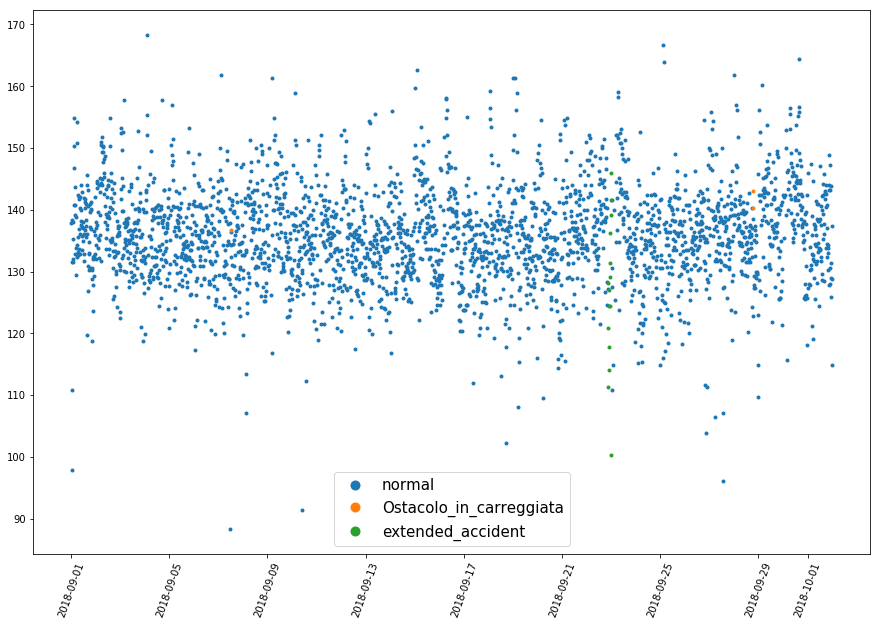

In [5]:
plot_speed_event(0,443,'2018-09-01','2018-10-02')

Ci sono  1818  rilevazioni del sensore in questo intervallo di tempo
Ci sono  4  eventi per quello specifico sensore in questo intervallo di tempo
Questi sono gli eventi che avvengo  ['Segnaletica_orizzontale' 'Manutenzione_opere_in_verde'
 'Manutenzione_opere_in_verde' 'Meteo']


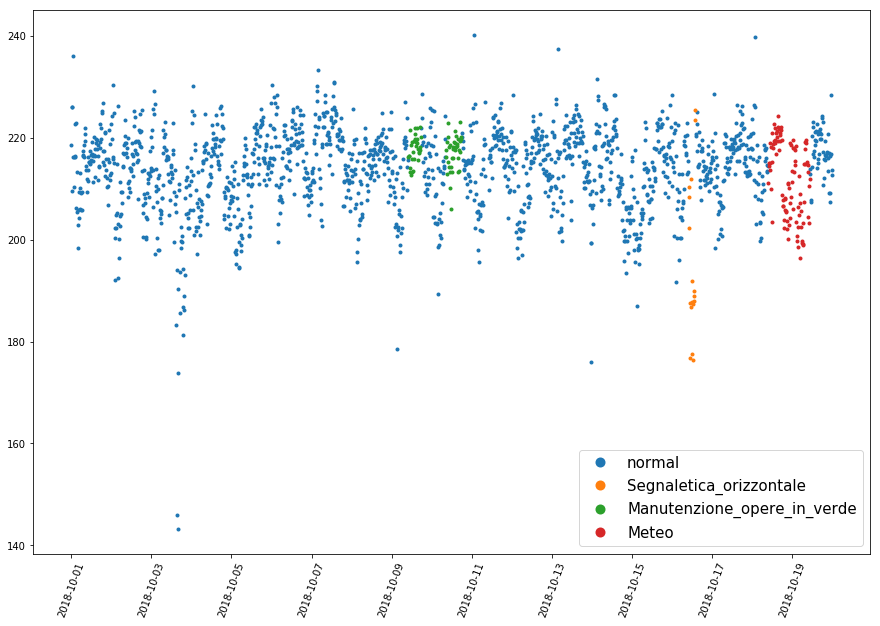

In [9]:
plot_speed_event(0,343,'2018-10-01','2018-10-20')

Ci sono  1780  rilevazioni del sensore in questo intervallo di tempo
Ci sono  1  eventi per quello specifico sensore in questo intervallo di tempo
Questi sono gli eventi che avvengo  ['Meteo']


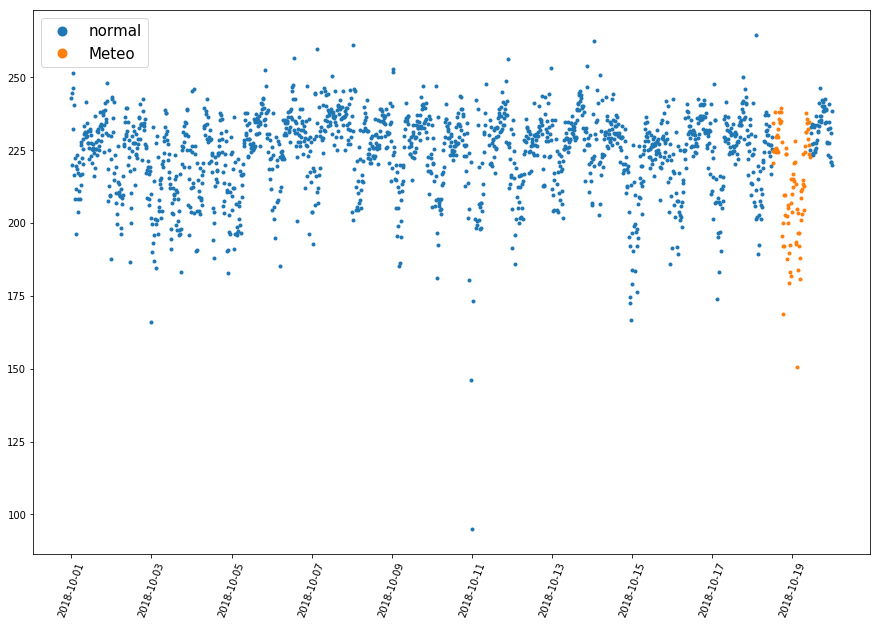

In [10]:
plot_speed_event(0,411,'2018-10-01','2018-10-20')

Ci sono  75  rilevazioni del sensore in questo intervallo di tempo
Ci sono  0  eventi per quello specifico sensore in questo intervallo di tempo
Questi sono gli eventi che avvengo  []


TypeError: float() argument must be a string or a number, not 'list'

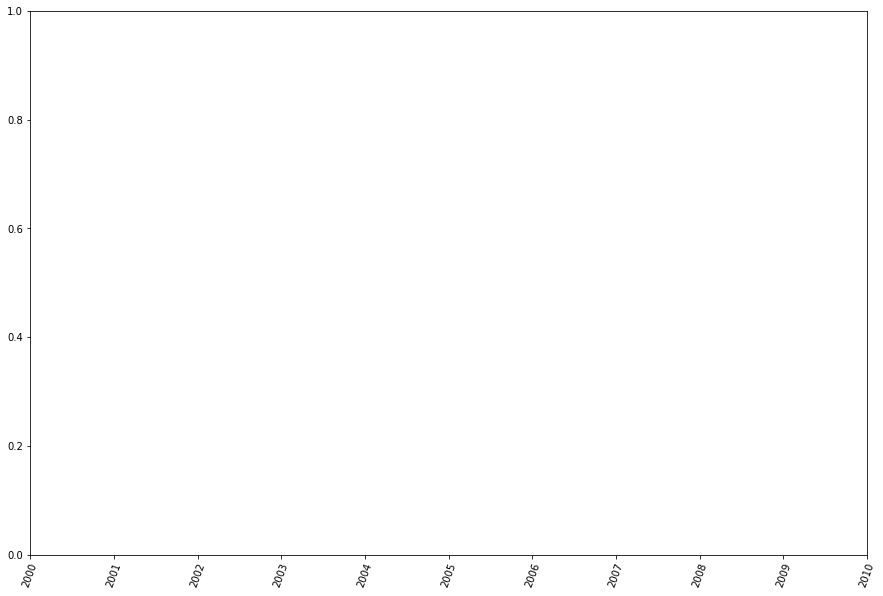

In [19]:
plot_speed_event(34,1907,'2018-09-13','2018-09-14')

Ci sono  5177  rilevazioni del sensore in questo intervallo di tempo
Ci sono  0  eventi per quello specifico sensore in questo intervallo di tempo
Questi sono gli eventi che avvengo  []


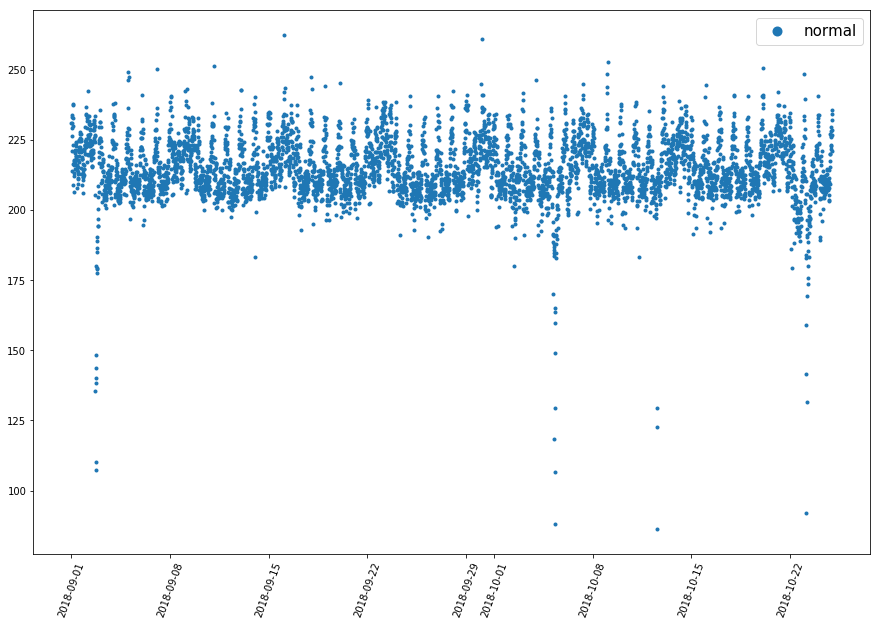

In [22]:
plot_speed_event(44,1427,'2018-09-01','2018-10-25')

Ci sono  5175  rilevazioni del sensore in questo intervallo di tempo
Ci sono  3  eventi per quello specifico sensore in questo intervallo di tempo
Questi sono gli eventi che avvengo  ['Gestione_viabilita' 'Ostacolo_in_carreggiata' 'Meteo']


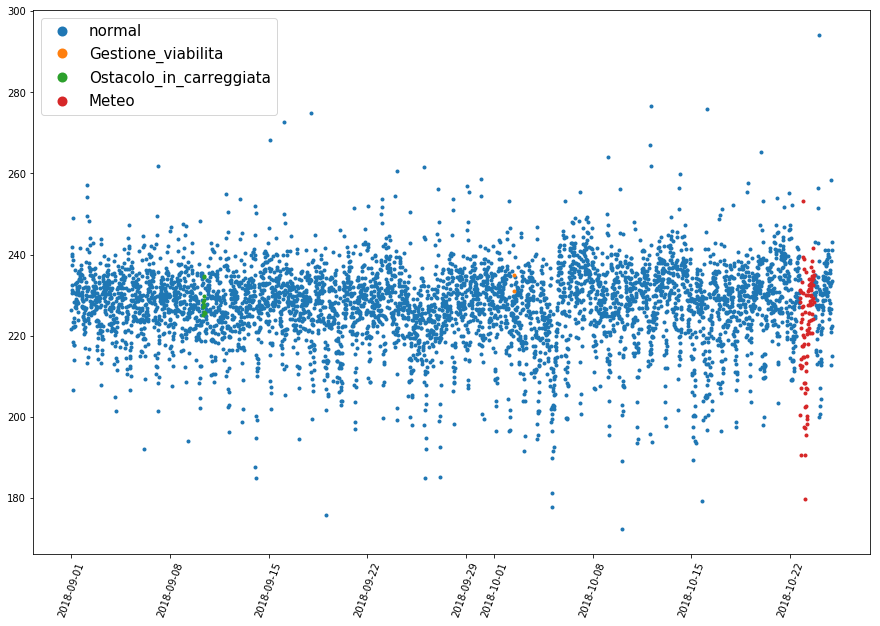

In [24]:
plot_speed_event(46,483,'2018-09-01','2018-10-25')